In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("c:/python/Sales_data.csv")

In [4]:
df.head(200)

,CÓD - Name,Street,Country,City,DATE OF PURCHASE / SALE,PURCHASE VALUE,DUE DATE,INDEX
0,844adica9 - ADICEIA CAMPOS DA FONSECA,AV. SIMEÃO DE FARIA,BRASIL,SÃO JOSÉ,1998-09-05,2,1998-10-31,0
1,542adiis9 - ADILSON ANICODEMOS DOS REIS,"JOÀO DE OLIVEIRA, 20",BRASIL,JACAREÍ,1998-11-01,2,1998-12-30,1
2,869adiva9 - ADILSON FRANCISCO DA SILVA,"LUIZ VICENTIM, 45",BRASIL,JACAREÍ,1998-08-03,2,1998-08-05,2
3,141adias9 - ADILSON NATAL VILAS BOAS,"RUA TORMALINO, 95",BRASIL,JACAREÍ,1998-09-02,2,1998-09-29,3
4,124adiso9 - ADILSON SANTANA IDELFONSO,"RUA GUARARÁPES, 51",BRASIL,JACAREÍ,1998-07-23,2,1998-08-26,4
...,...,...,...,...,...,...,...,...
195,1arlda9 - ARLEM GRAZIEL DIAS DE ALMEIDA,"RUA BENTO GONCALVES, 45",BRASIL,TRES RIOS,2002-10-09,5,2002-10-12,195
196,7artto9 - ARTHUR BARRA PORTO,"RUA N, 83",BRASIL,TRES RIOS,2002-10-18,5,2002-12-08,196
197,6artra9 - ARTHUR CAMPOS DE OLIVEIRA,"RUA CORONEL ALCINDO NUNES PEREIRA, 94/03",BRASIL,TRES RIOS,2002-10-29,5,2002-11-11,197
198,1athra9 - ATHOS CUSTÓDIO SIQUEIRA,"RUA ASSUENE ANTONIO RIBEIRO,890",BRASIL,TRES RIOS,2002-11-21,5,2003-01-07,198


In [5]:
df.dtypes

CÓD - Name                 object
Street                     object
Country                    object
City                       object
DATE OF PURCHASE / SALE    object
PURCHASE VALUE              int64
DUE DATE                   object
INDEX                       int64
dtype: object

# Valor total de vendas no Brasil

In [6]:
sum_pur_Brasil = df.loc[df['Country'] == 'BRASIL', 'PURCHASE VALUE'].sum()

In [7]:
print('As vendas totais no Brasil foram de R$ '+str(sum_pur_Brasil))

As vendas totais no Brasil foram de R$ 30489


# A quantidade total de vendas no Brasil

### T est

In [8]:
count_pur_Brasil = df.loc[df['Country'] == 'BRASIL', 'PURCHASE VALUE'].count()

In [9]:
print('A quantidade de vendas totais no Brasil foram de '+str(count_pur_Brasil))

A quantidade de vendas totais no Brasil foram de 933


# O valor de vendas no Brasil na cidade de São José

In [10]:
df.loc[df['City']=='SÃO JOSÉ', 'PURCHASE VALUE'].sum()

189

# Valor de vendas em datas específicas

In [13]:
df.dtypes

CÓD - Name                         object
Street                             object
Country                            object
City                               object
DATE OF PURCHASE / SALE            object
PURCHASE VALUE                      int64
DUE DATE                   datetime64[ns]
INDEX                               int64
dtype: object

# Transformar colunas de formato object em formato data

In [12]:
df['DUE DATE'] = pd.to_datetime(df['DUE DATE'])

In [14]:
df['DATE OF PURCHASE / SALE'] = pd.to_datetime(df['DATE OF PURCHASE / SALE'])

In [15]:
df.dtypes

CÓD - Name                         object
Street                             object
Country                            object
City                               object
DATE OF PURCHASE / SALE    datetime64[ns]
PURCHASE VALUE                      int64
DUE DATE                   datetime64[ns]
INDEX                               int64
dtype: object

## Valor total das vendas nos meses de novembro

In [16]:
df.loc[df['DUE DATE'].dt.month == 11,'PURCHASE VALUE'].sum()

38454

## Valor total das vendas no ano de 2003

In [17]:
df.loc[df['DUE DATE'].dt.year == 2003,'PURCHASE VALUE'].sum()

102757

## Valor total das vendas em novembro do ano de 2003

In [18]:
df.loc[(df['DUE DATE'].dt.year == 2003)&(df['DUE DATE'].dt.month == 11),'PURCHASE VALUE'].sum()

6903

## Tratando os dados para gerar gráficos (método pivot_table)

## Valores das vendas (total, quantidade e média)  por país

In [19]:
df_ct = df.pivot_table(values='PURCHASE VALUE', index=['Country'], 
                            aggfunc=('sum','count','mean'))

In [20]:
df_ct

,count,mean,sum
Country,,,
BRASIL,933.0,32.678457,30489.0
MÉXICO,34.0,55.000000,1870.0
SERVIA,1144.0,448.144231,512677.0


## Gerando gráficos

## Gráfico de pizza dos valores de  vendas por país

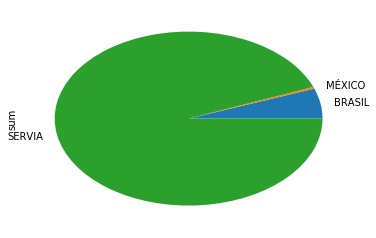

In [21]:
df_ct['sum'].plot.pie()

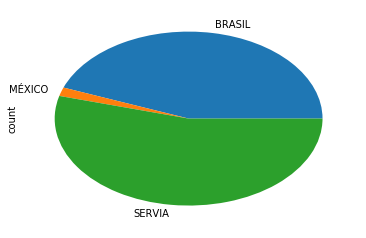

In [22]:
df_ct['count'].plot.pie()

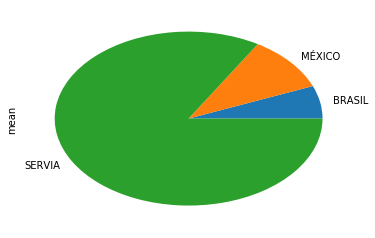

In [23]:
df_ct['mean'].plot.pie()

## Gráfico de barra dos valores de  vendas por país

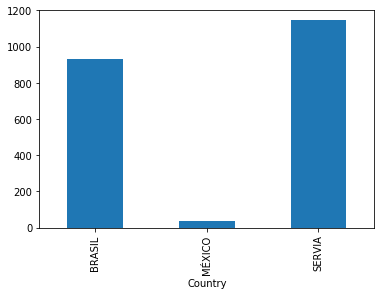

In [24]:
df_ct['count'].plot.bar()

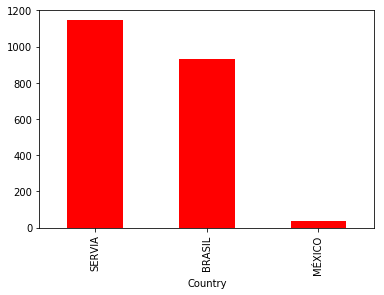

In [27]:
df_ct['count'].sort_values(ascending=False).plot.bar(color='red')